In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/DANO_O2/Covid/covid_dataset-unified-w-fed_dist-cleaned.csv')
data

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,infections,deaths,healed,tests,Rt,level,yandex_continuous,yandex_level,pass,federal_district
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
75600,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
75601,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
75602,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО


Посмотрим количество заболеваний по Федеральным Округам

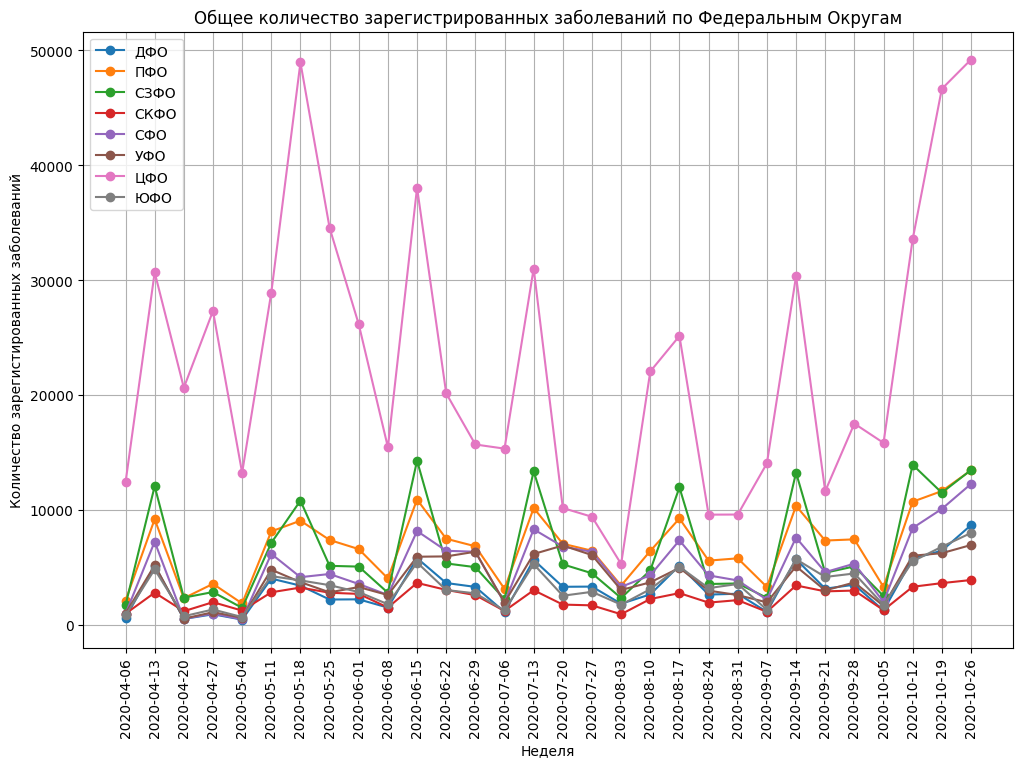

In [17]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = unique_infections_by_region_week.groupby(['week', 'federal_district'])['infections'].sum().reset_index()

unique_oced = grouped_data['federal_district'].unique()

plt.figure(figsize=(12, 8))
for profession in unique_oced:
    profession_data = grouped_data[grouped_data['federal_district'] == profession]
    plt.plot(profession_data['week'], profession_data['infections'], label=profession, marker='o')

plt.title('Общее количество зарегистрированных заболеваний по Федеральным Округам')
plt.xlabel('Неделя')
plt.ylabel('Количество зарегистированных заболеваний')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Явно выделяется СФО, посмотрим на влияние регионов

In [18]:
feddist_data = data[data['federal_district'] == 'ЦФО']

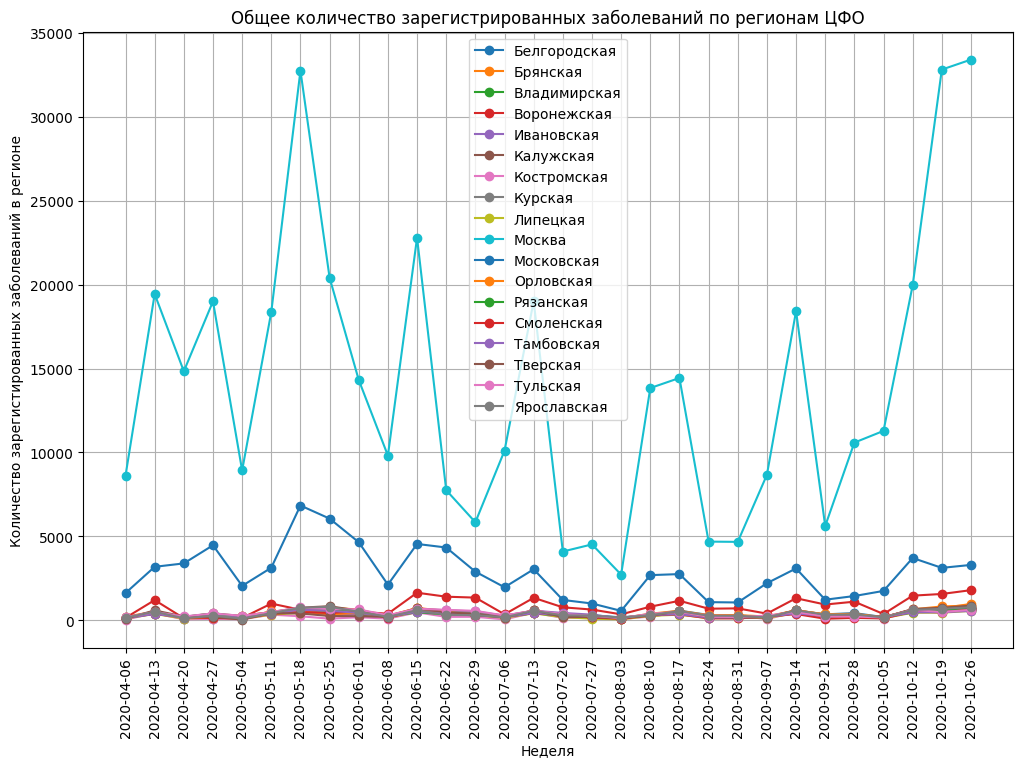

In [22]:
unique_infections_by_region_week = feddist_data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = unique_infections_by_region_week.groupby(['week', 'region'])['infections'].sum().reset_index()

unique_oced = grouped_data['region'].unique()

plt.figure(figsize=(12, 8))
for profession in unique_oced:
    profession_data = grouped_data[grouped_data['region'] == profession]
    plt.plot(profession_data['week'], profession_data['infections'], label=profession, marker='o')

plt.title('Общее количество зарегистрированных заболеваний по регионам ЦФО')
plt.xlabel('Неделя')
plt.ylabel('Количество зарегистированных заболеваний в регионе')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Явно выделяется Москва.
Смотрим заболеваемость по Москве и стране (Федеральные округа (ЦФО без Москвы))

In [20]:
moscow_data = data[data['region'] == 'Москва']

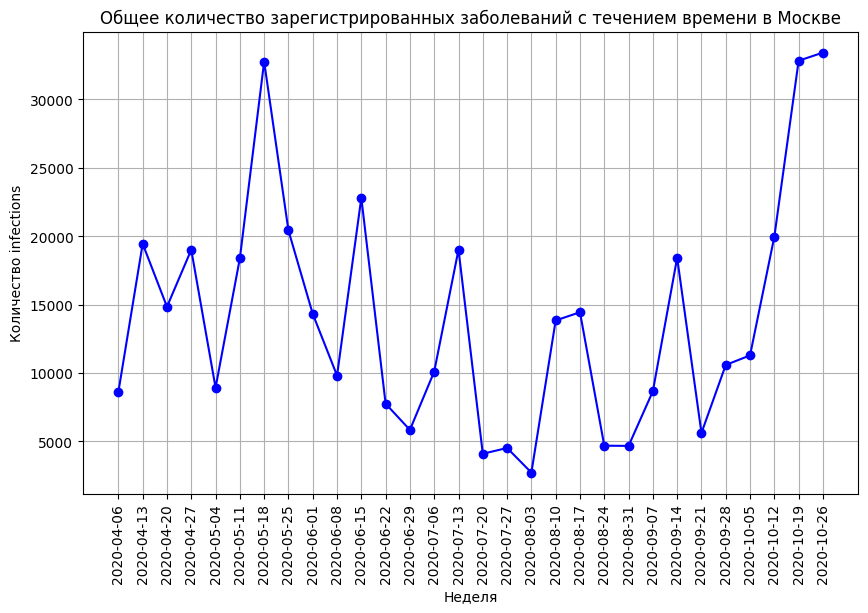

In [23]:
unique_infections_by_region_week = moscow_data.drop_duplicates(['region', 'week', 'infections'])
total_claims = unique_infections_by_region_week.groupby('week')['infections'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_claims.index, total_claims.values, marker='o', linestyle='-', color='b')
plt.title('Общее количество зарегистрированных заболеваний с течением времени в Москве')
plt.xlabel('Неделя')
plt.ylabel('Количество infections')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

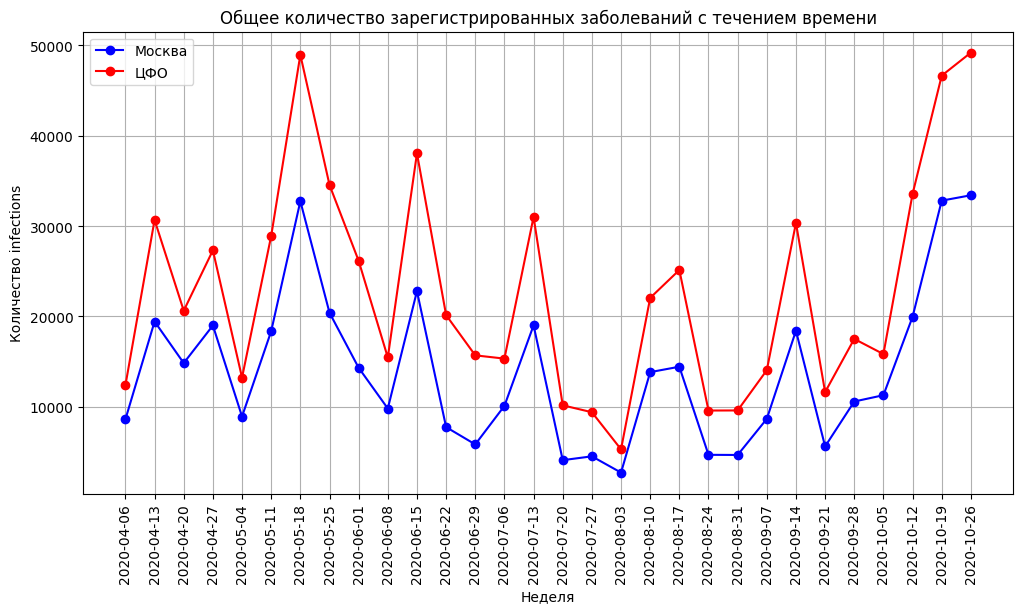

In [24]:
moscow_data = data[data['region'] == 'Москва']
cfo_data = data[data['federal_district'] == 'ЦФО']
unique_infections_by_moscow = moscow_data.drop_duplicates(['region', 'week', 'infections'])
unique_infections_by_cfo = cfo_data.drop_duplicates(['region', 'week', 'infections'])
total_claims_moscow = unique_infections_by_moscow.groupby('week')['infections'].sum()
total_claims_cfo = unique_infections_by_cfo.groupby('week')['infections'].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_claims_moscow.index, total_claims_moscow.values, marker='o', linestyle='-', color='b', label='Москва')

plt.plot(total_claims_cfo.index, total_claims_cfo.values, marker='o', linestyle='-', color='r', label='ЦФО')

plt.title('Общее количество зарегистрированных заболеваний с течением времени')
plt.xlabel('Неделя')
plt.ylabel('Количество infections')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Количество заболеваний значительно больше чем в остальном ЦФО

Исключим Москву из ЦФО из выборки
Почему?
Исключаем наблюдения по Москве по некоторым причинам (очень выделяется по специфике на фоне остальных регионов):

- более высокий средний доход населения
- более жесткие меры контроля медицинских ограничений
- более распространенных тестирований на ковид

In [25]:
no_moscow_data = data[data['region'] != 'Москва']

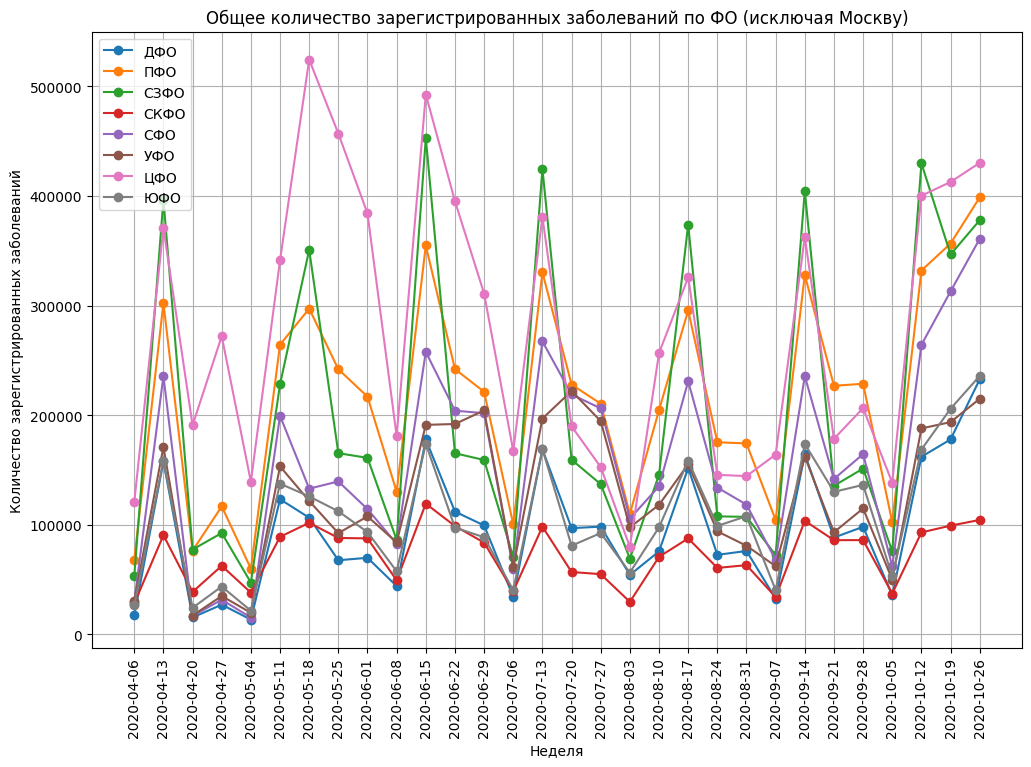

In [28]:
unique_infections_by_no_moscow = no_moscow_data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = no_moscow_data.groupby(['week', 'federal_district'])['infections'].sum().reset_index()
unique_oced = grouped_data['federal_district'].unique()
plt.figure(figsize=(12, 8))
for profession in unique_oced:
    profession_data = grouped_data[grouped_data['federal_district'] == profession]
    plt.plot(profession_data['week'], profession_data['infections'], label=profession, marker='o')

plt.title('Общее количество зарегистрированных заболеваний по ФО (исключая Москву)')
plt.xlabel('Неделя')
plt.ylabel('Количество зарегистрированных заболеваний')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Теперь гораздо лучше

In [29]:
no_moscow_file_path = 'dataset_fd_Sp_no-Mos.csv'
no_moscow_data.to_csv(no_moscow_file_path, index=False)

print(f"Данные без строк, где 'region' равно 'Москва', сохранены в файл: {no_moscow_file_path}")

Данные без строк, где 'region' равно 'Москва', сохранены в файл: dataset_fd_Sp_no-Mos.csv


In [30]:
no_moscow_data

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,infections,deaths,healed,tests,Rt,level,yandex_continuous,yandex_level,pass,federal_district
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
75600,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
75601,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
75602,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
